In [50]:
import numexpr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

In [11]:
def fmt_items(lines,max_lines=0):
    max_width=max([len(line)for line in lines])
    empty =' '*max_width
    lines = [line.ljust(max_width)for line in lines]
    lines += [empty]*(max_lines - len(lines))
    return lines
def pp (*list):
    lines = [ str(item).split('\n') for item in list]
    max_lines=max([len(item)for  item in lines])
    lines = [fmt_items(item,max_lines=max_lines)for item in lines]
    lines_t= np.array(lines).T
    print('\n'.join([' '.join(line) for  line in lines_t]))

# Machine Learning


## chapter 5

In [3]:
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0,
                           random_state=4, n_clusters_per_class=1,
                           n_classes=2,class_sep =3)

In [4]:
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

[-1, 4, -2, 7]

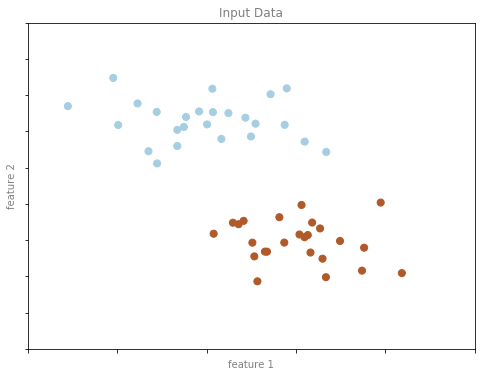

In [6]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])



[-1, 4, -2, 7]

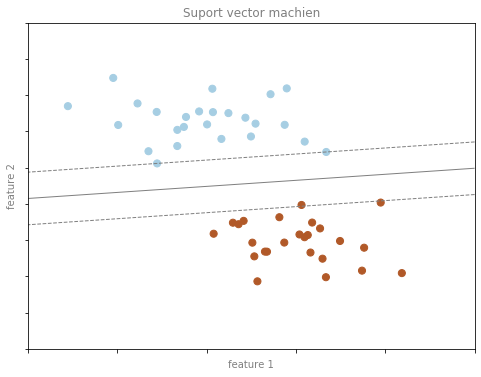

In [7]:
#get counters 
x1 = np.linspace(-1,4,10)
y1 = np.linspace(-2,7,10)
xx,yy = np.meshgrid(x1,y1)
Z = np.array([clf.decision_function([X]) for X in zip(xx.flat,yy.flat)]).reshape(10,10)
#draw plot
fig,ax = plt.subplots(figsize=(8,6))
line_style = dict(levels = [-1,0,1],
                 linestyles  = ['dashed','solid','dashed'],
                 colors = 'gray',linewidths = 1)
ax.scatter(X[:,0],X[:,1],c=y,**point_style)
ax.contour(xx,yy,Z,**line_style)
#format
format_plot(ax,'Suport vector machien')
ax.axis([-1,4,-2,7])

In [45]:
rng  = np.random.RandomState(1)


X = rng.randn(200,2)
y = np.dot(X,[-2,1])+0.1 * rng.randn(X.shape[0])

model = LinearRegression()
model.fit(X,y)

X1 = rng.randn(100,2)
y1 = model.predict(X1)
print(X.shape)

(200, 2)


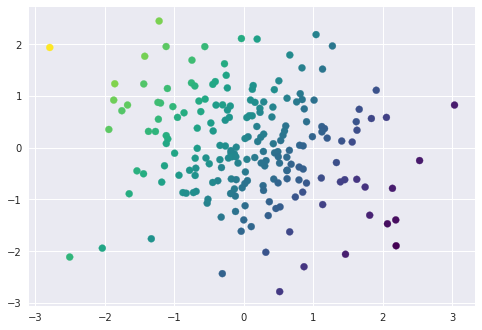

In [49]:
with plt.style.context('seaborn'):
    fig,ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

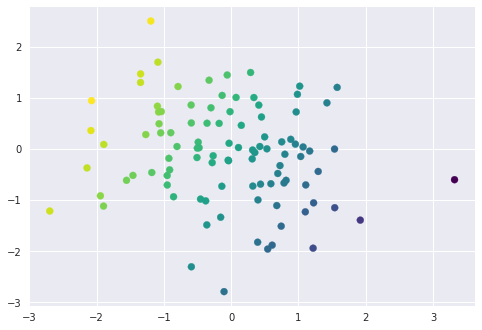

In [52]:
with plt.style.context('seaborn'):
    plt.scatter(X1[:,0],X1[:,1],c=y1,cmap='viridis')

In [53]:
points = np.hstack([X,y[:,None]]).reshape(-1,1,3)

In [61]:
print([X,y[:,None]])

[array([[ 1.62434536e+00, -6.11756414e-01],
       [-5.28171752e-01, -1.07296862e+00],
       [ 8.65407629e-01, -2.30153870e+00],
       [ 1.74481176e+00, -7.61206901e-01],
       [ 3.19039096e-01, -2.49370375e-01],
       [ 1.46210794e+00, -2.06014071e+00],
       [-3.22417204e-01, -3.84054355e-01],
       [ 1.13376944e+00, -1.09989127e+00],
       [-1.72428208e-01, -8.77858418e-01],
       [ 4.22137467e-02,  5.82815214e-01],
       [-1.10061918e+00,  1.14472371e+00],
       [ 9.01590721e-01,  5.02494339e-01],
       [ 9.00855949e-01, -6.83727859e-01],
       [-1.22890226e-01, -9.35769434e-01],
       [-2.67888080e-01,  5.30355467e-01],
       [-6.91660752e-01, -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01],
       [-6.71246131e-01, -1.26645989e-02],
       [-1.11731035e+00,  2.34415698e-01],
       [ 1.65980218e+00,  7.42044161e-01],
       [-1.91835552e-01, -8.87628964e-01],
       [-7.47158294e-01,  1.69245460e+00],
       [ 5.08077548e-02, -6.36995647e-01],
       [ 1